In [1]:
import sqlite3

# Create database in memory (temporary, no file)
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert data
data = [
    ('Laptop', 2, 55000),
    ('Mouse', 5, 500),
    ('Keyboard', 3, 1500),
    ('Laptop', 1, 55000),
    ('Mouse', 2, 500)
]

cursor.executemany(
    "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", 
    data
)

conn.commit()

# Check data
cursor.execute("SELECT * FROM sales")
print(cursor.fetchall())

[(1, 'Laptop', 2, 55000.0), (2, 'Mouse', 5, 500.0), (3, 'Keyboard', 3, 1500.0), (4, 'Laptop', 1, 55000.0), (5, 'Mouse', 2, 500.0)]


In [2]:
conn = sqlite3.connect(":memory:")

In [3]:
sqlite3.connect("sales_data.db")

In [8]:
cursor.execute("""
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
""")

results = cursor.fetchall()

for row in results:
    print(row)

('Keyboard', 3, 4500.0)
('Laptop', 3, 165000.0)
('Mouse', 7, 3500.0)


In [11]:
products = []
revenues = []

for row in results:
    products.append(row[0])
    revenues.append(row[2])

print(products)
print(revenues)

['Keyboard', 'Laptop', 'Mouse']
[4500.0, 165000.0, 3500.0]


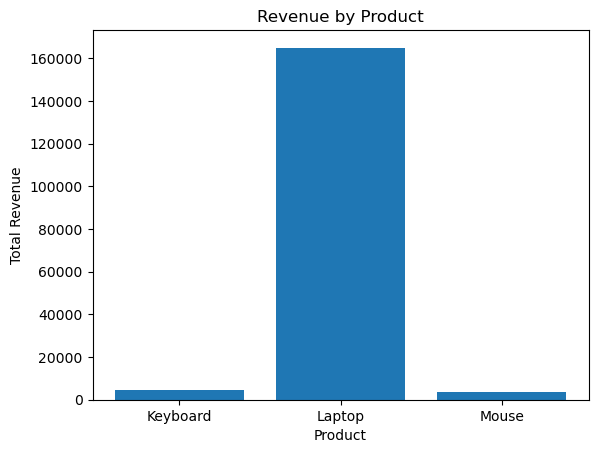

In [12]:
import matplotlib.pyplot as plt

plt.bar(products, revenues)

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()

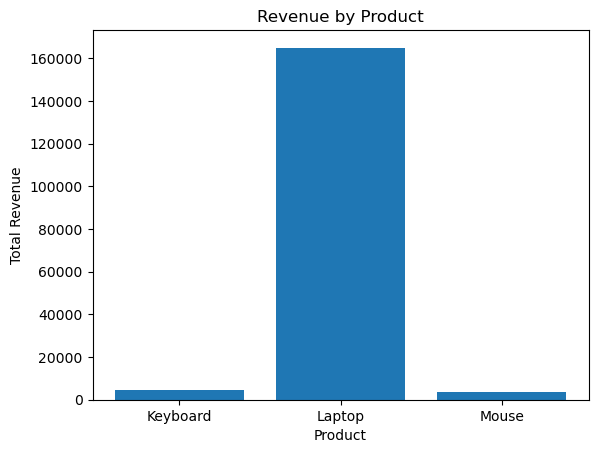

In [14]:
plt.bar(products, revenues)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()

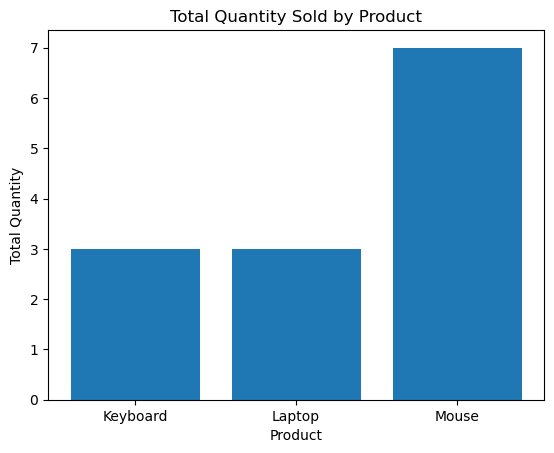

In [15]:
quantities = []

for row in results:
    quantities.append(row[1])

plt.bar(products, quantities)
plt.title("Total Quantity Sold by Product")
plt.xlabel("Product")
plt.ylabel("Total Quantity")
plt.show()

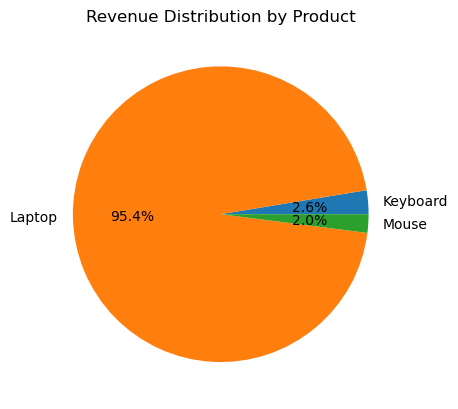

In [16]:
plt.pie(revenues, labels=products, autopct='%1.1f%%')
plt.title("Revenue Distribution by Product")
plt.show()

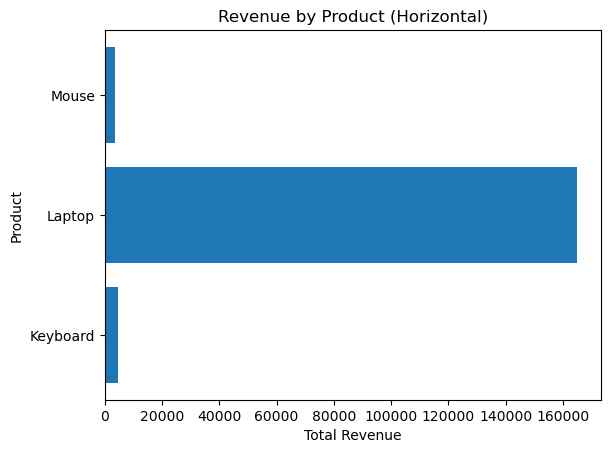

In [17]:
plt.barh(products, revenues)
plt.title("Revenue by Product (Horizontal)")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.show()